<a href="https://colab.research.google.com/github/Andreaierardi/SocialNetworkAnalysis-project/blob/main/project_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Social Network Analysis Project**

> ## **University of Milan** - **DataScience and Economics**

<br>

#### Author : **Andrea Ierardi**

<br>


---




 <br>






## Dataset
### Description

Data collected about Facebook pages (November 2017). These datasets represent blue verified Facebook page networks of different categories. Nodes represent the pages and edges are mutual likes among them.








 <br>






In [149]:
import pandas as pd
nodes = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.csv',sep=";")

edges = pd.read_csv('https://raw.githubusercontent.com/Andreaierardi/SocialNetworkAnalysis-project/main/dataset/fb-pages-food.edges')


In [150]:
print(nodes)
print(edges)

                        name   id
0                 Josh Marks  386
1    Blue Ribbon Restaurants  473
2                  Pat Neely    1
3                 La Griglia  542
4                Jose Garces  189
..                       ...  ...
615               Jumia Food  163
616              Luke Thomas  381
617          Clodagh McKenna  140
618  Chef Michelle Bernstein  157
619               SORTEDfood  114

[620 rows x 2 columns]
      source  target
0          0     276
1          0      58
2          0     132
3          0     603
4          0     398
...      ...     ...
2097     597     611
2098     601     603
2099     601     616
2100     603     616
2101     311     613

[2102 rows x 2 columns]


In [151]:
# Nodes as dictionary
nodes_dict = {}
for (n, id) in zip(nodes["name"],nodes["id"]):
  print(n, "+", id)
  nodes_dict[id] = n

Josh Marks + 386
Blue Ribbon Restaurants + 473
Pat Neely + 1
La Griglia + 542
Jose Garces + 189
Zac Kara + 454
Big Fish Seafood Bistro + 158
Tom Aikens + 248
The Habit Burger Grill + 537
Chef Sheldon Simeon + 293
Ochikeron + 171
Taco Bell Cyprus + 485
Christophe Michalak + 258
Peohe's + 534
Destino Ibiza + 500
KFC + 194
Chef Shirley Chung + 34
Doug Adams + 465
משה שגב / Moshe Segev + 562
Angel Leon Gonzalez + 511
Ben Ebbrell - Sorted Chef + 201
Dick's Drive In Restaurant + 188
John Whaite + 440
Andy Luotto + 484
Antonino Cannavacciuolo + 240
Charley's Crab + 533
Anne-Sophie Pic + 235
Hilah Cooking + 82
Taco Bell Costa Rica + 212
Chef Robert Irvine + 35
Nutella Cafe Chicago + 19
Grand Concourse + 154
Domino's Pizza + 334
Chef Lorena Garcia + 148
James Martin + 599
Domino's Pizza + 382
Nando's + 230
Roy Yamaguchi + 7
Susan Feniger + 576
McDonald's + 164
Al Brown New Zealand Chef + 594
Veggie Grill + 396
Domino's Pizza + 284
McDonald's + 63
Franklin Becker + 160
McDonald's + 573
Éric Frec

\





## Network Building



In [152]:
import networkx as nx
from statsmodels.distributions.empirical_distribution import ECDF
import numpy as np
import matplotlib.pyplot as plt

In [153]:
G = nx.Graph()

for e in edges.values.tolist():
  G.add_edge(e[0],e[1])

In [154]:
H = nx.relabel_nodes(G, nodes_dict)
len(sorted(H))

460

In [155]:
print('Number of nodes: {} - Number of links:{}'.format(G.order(),G.size()))


Number of nodes: 620 - Number of links:2102


\

# Degree Analysis

In [156]:
G.nodes()

NodeView((0, 276, 58, 132, 603, 398, 555, 1, 265, 611, 2, 182, 345, 3, 608, 377, 40, 352, 450, 484, 299, 65, 185, 228, 557, 227, 90, 151, 394, 4, 287, 254, 336, 5, 503, 6, 429, 163, 486, 478, 518, 7, 293, 305, 339, 35, 444, 583, 8, 278, 434, 73, 98, 369, 9, 317, 288, 206, 289, 249, 593, 550, 131, 446, 89, 15, 340, 248, 229, 56, 570, 189, 107, 23, 465, 67, 351, 498, 10, 393, 258, 11, 212, 485, 264, 380, 174, 259, 12, 548, 618, 310, 13, 14, 326, 70, 454, 505, 43, 432, 16, 516, 119, 400, 545, 334, 237, 374, 117, 274, 613, 466, 75, 17, 18, 408, 418, 581, 143, 599, 20, 324, 355, 481, 238, 242, 160, 21, 441, 329, 22, 270, 187, 104, 420, 128, 257, 277, 157, 343, 54, 24, 547, 230, 502, 306, 501, 591, 25, 363, 26, 27, 424, 28, 147, 527, 29, 49, 30, 126, 31, 285, 543, 357, 507, 508, 491, 169, 595, 41, 63, 327, 266, 48, 179, 546, 142, 449, 269, 524, 488, 515, 193, 315, 32, 183, 364, 159, 300, 504, 118, 430, 164, 165, 127, 395, 596, 79, 448, 335, 307, 572, 313, 45, 532, 526, 552, 517, 181, 558, 51

In [157]:
density = nx.density(G)
print('Density: {}'.format(density))

Density: 0.0109541925061233


In [208]:
degree = list(dict(G.degree()).values())
degree[0:20]

[6, 11, 15, 2, 27, 9, 17, 2, 134, 47, 3, 31, 11, 10, 7, 10, 7, 19, 7, 3]

In [209]:
print('Standard deviation: {}'.format(np.std(degree)))
print('Mean: {}'.format(np.mean(degree)))
print('Median: {}'.format(np.median(degree)))
print('Min: {}'.format(np.min(degree)))
print('Max: {}'.format(np.max(degree)))


print("Assortativity coefficient: " + str(nx.degree_assortativity_coefficient(G)))

Standard deviation: 9.46914920573866
Mean: 6.780645161290322
Median: 4.0
Min: 1
Max: 134
Assortativity coefficient: -0.028203795222469928


\

### ECDF

Text(0, 0.5, 'ECDF Food')

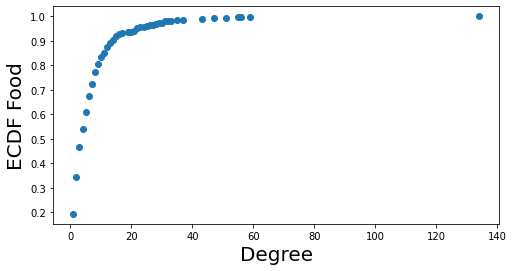

In [160]:
# ECDF linear scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.plot(x,y,marker='o',ms=6, linestyle='None')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)

Text(0, 0.5, 'ECDF Food')

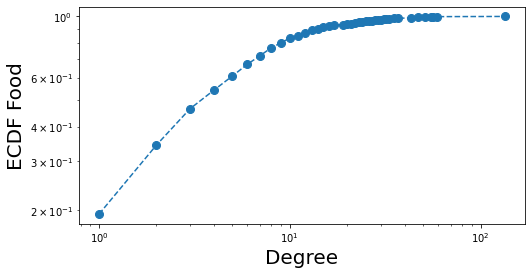

In [161]:

# ECDF loglog scale
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECDF Food', size = 20)


Text(0, 0.5, 'ECCDF FOOD')

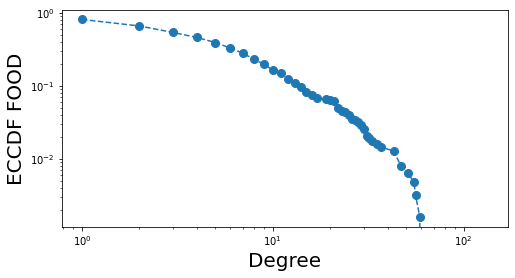

In [162]:
# ECCDF
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)
fig_cdf = plt.figure(figsize=(8,4))
axes = fig_cdf.gca()
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF FOOD', size = 20)

In [163]:
p = density
random_graph = nx.fast_gnp_random_graph(G.order(),p)


In [164]:
print('Number of nodes: {}'.format(random_graph.order()))
print('Number of links: {}'.format(random_graph.size()))

Number of nodes: 620
Number of links: 2125


In [213]:
random_degree = list(dict(random_graph.degree()).values())
print('Random Net Standard deviation: {}'.format(np.std(random_degree)))
print('Random Net Mean: {}'.format(np.mean(random_degree)))
print('Random Net Median: {}'.format(np.median(random_degree)))
print('Random Net Min: {}'.format(np.min(random_degree)))
print('Random Net Max: {}'.format(np.max(random_degree)))

Random Net Standard deviation: 2.6733256695127428
Random Net Mean: 6.854838709677419
Random Net Median: 7.0
Random Net Min: 0
Random Net Max: 17


Text(0, 0.5, 'ECCDF')

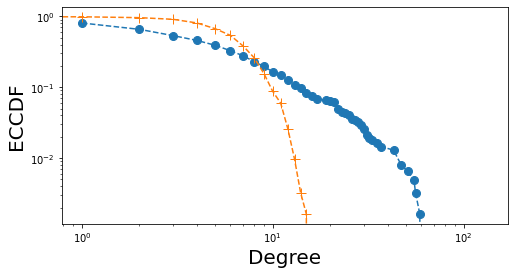

In [166]:
cdf = ECDF(degree)
x = np.unique(degree)
y = cdf(x)

cdf_random = ECDF(random_degree)
x_random = np.unique(random_degree)
y_random = cdf_random(x_random)

fig_cdf_fb = plt.figure(figsize=(8,4))
axes = fig_cdf_fb.gca()
axes.set_xscale('log')
axes.set_yscale('log')
axes.loglog(x,1-y,marker='o',ms=8, linestyle='--')
axes.loglog(x_random,1-y_random,marker='+',ms=10, linestyle='--')
axes.set_xlabel('Degree',size=20)
axes.set_ylabel('ECCDF', size = 20)

\

## HUBS

In [167]:
percentile_99 = np.percentile(degree,99)
print(percentile_99)

47.0


In [168]:
hub_nodi = [k for k,v in dict(G.degree()).items() if v>= percentile_99]


In [169]:
print(len(hub_nodi))
print(list(hub_nodi))

8
[265, 611, 90, 518, 340, 56, 67, 70]


In [224]:
for h in hub_nodi:
  print(nodes_dict[h])


Logan Junior Chef
Robin Miller
Scott Conant
McDonald's
Eric Ripert
Alex Guarnaschelli
David Chang
Chef Daniel Boulud


In [170]:
print(list(nx.isolates(G)))


[]


\

## Connectivity

In [171]:
print(nx.is_connected(G))
print(nx.number_connected_components(G))

True
1


In [185]:
import math

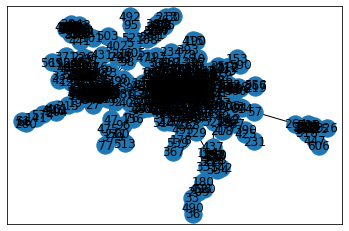

In [199]:
nx.draw_networkx(G,with_labels=True)


In [173]:
nx.number_connected_components(G)

1

In [174]:
#dir(G)

In [177]:
nodes

,name,id
0,Josh Marks,386
1,Blue Ribbon Restaurants,473
2,Pat Neely,1
3,La Griglia,542
4,Jose Garces,189
...,...,...
615,Jumia Food,163
616,Luke Thomas,381
617,Clodagh McKenna,140
618,Chef Michelle Bernstein,157


In [178]:
len(nx.triangles(G))

620

\

\

## Clusters

In [245]:
clusters = nx.average_clustering(G)
clusters

0.3308970263553271

In [181]:
type(clusters)

dict

In [244]:
nx.transitivity(G)


0.22264084150905228

In [250]:
local_cluster = nx.clustering(G)
sorted(local_cluster.items(), key=lambda item: item[1], reverse= True)


[(1, 1.0),
 (2, 1.0),
 (486, 1.0),
 (73, 1.0),
 (259, 1.0),
 (466, 1.0),
 (75, 1.0),
 (270, 1.0),
 (420, 1.0),
 (306, 1.0),
 (28, 1.0),
 (504, 1.0),
 (430, 1.0),
 (165, 1.0),
 (532, 1.0),
 (388, 1.0),
 (615, 1.0),
 (594, 1.0),
 (417, 1.0),
 (86, 1.0),
 (110, 1.0),
 (52, 1.0),
 (59, 1.0),
 (139, 1.0),
 (602, 1.0),
 (525, 1.0),
 (115, 1.0),
 (241, 1.0),
 (81, 1.0),
 (91, 1.0),
 (94, 1.0),
 (256, 1.0),
 (348, 1.0),
 (120, 1.0),
 (455, 1.0),
 (574, 1.0),
 (438, 1.0),
 (279, 1.0),
 (472, 1.0),
 (533, 1.0),
 (610, 1.0),
 (178, 1.0),
 (246, 1.0),
 (191, 1.0),
 (316, 1.0),
 (203, 1.0),
 (435, 1.0),
 (204, 1.0),
 (405, 1.0),
 (589, 1.0),
 (549, 1.0),
 (322, 1.0),
 (263, 1.0),
 (346, 1.0),
 (588, 1.0),
 (587, 1.0),
 (571, 1.0),
 (297, 1.0),
 (487, 1.0),
 (457, 1.0),
 (237, 0.9454545454545454),
 (11, 0.9333333333333333),
 (212, 0.9333333333333333),
 (249, 0.9),
 (189, 0.9),
 (48, 0.9),
 (16, 0.8939393939393939),
 (119, 0.8939393939393939),
 (400, 0.8939393939393939),
 (274, 0.8939393939393939),
 

In [251]:
triangle = nx.triangles(G)
triangle

{0: 4,
 1: 1,
 2: 3,
 3: 10,
 4: 1,
 5: 0,
 6: 5,
 7: 5,
 8: 1,
 9: 130,
 10: 0,
 11: 14,
 12: 0,
 13: 0,
 14: 0,
 15: 26,
 16: 59,
 17: 4,
 18: 0,
 19: 0,
 20: 0,
 21: 2,
 22: 4,
 23: 15,
 24: 10,
 25: 0,
 26: 0,
 27: 0,
 28: 3,
 29: 0,
 30: 0,
 31: 38,
 32: 8,
 33: 0,
 34: 5,
 35: 69,
 36: 0,
 37: 0,
 38: 0,
 39: 3,
 40: 3,
 41: 12,
 42: 0,
 43: 21,
 44: 0,
 45: 7,
 46: 8,
 47: 0,
 48: 9,
 49: 0,
 50: 13,
 51: 0,
 52: 1,
 53: 0,
 54: 2,
 55: 24,
 56: 271,
 57: 0,
 58: 36,
 59: 1,
 60: 10,
 61: 0,
 62: 16,
 63: 17,
 64: 0,
 65: 13,
 66: 0,
 67: 280,
 68: 29,
 69: 2,
 70: 195,
 71: 0,
 72: 1,
 73: 1,
 74: 0,
 75: 36,
 76: 0,
 77: 0,
 78: 25,
 79: 9,
 80: 0,
 81: 1,
 82: 2,
 83: 13,
 84: 2,
 85: 5,
 86: 1,
 87: 148,
 88: 3,
 89: 167,
 90: 319,
 91: 1,
 92: 0,
 93: 3,
 94: 1,
 95: 0,
 96: 0,
 97: 0,
 98: 0,
 99: 0,
 100: 0,
 101: 11,
 102: 8,
 103: 2,
 104: 6,
 105: 0,
 106: 1,
 107: 34,
 108: 6,
 109: 2,
 110: 1,
 111: 3,
 112: 0,
 113: 18,
 114: 5,
 115: 1,
 116: 67,
 117: 59,
 118: 2,

\

## Centrality



In [243]:
deg_centr = nx.degree_centrality(G)


In [242]:
eigen = nx.eigenvector_centrality(G)
#eigen

In [241]:
pagerank = nx.pagerank(G)
#pagerank

In [240]:
betweenesCentrality = nx.betweenness_centrality(G)
#betweenesCentrality

\

## Communities


In [253]:
from networkx.algorithms import community

greedy = community.greedy_modularity_communities(G)

In [254]:
c = list(greedy)
for i in range(0, len(c)):
    print(len(c[i]))

164
72
53
46
37
36
33
31
31
30
17
17
13
6
6
6
5
5
5
3
2
2
